# 3章 線形システムの特性

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
# 図を保存するかどうか
is_savefig = False
# 図の保存パス
figpath="./notebook_output/"  

In [6]:
# 数式処理のためにsympyをインポート
import sympy as sp
from sympy.matrices import *

##　3.1 伝達関数の時間応答

### 図3.1 １次系の時間応答

伝達関数の定義

In [7]:
K = 1
T = 1
P = tf([0, K], [T, 1])
P

TransferFunction(array([1]), array([1, 1]))

インパルス応答

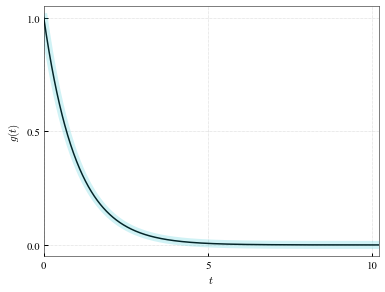

In [8]:
fig, ax = plt.subplots(figsize=(6, 4.6))

LS = linestyle_generator()

y, t = impulse(P, np.arange(0, 10.2, 0.01))
pltargs = {'c':'k','ls': next(LS),'label':' '}
ax.plot(t, y, **pltargs)

y_th=np.array( list(map(lambda t:(K/T*np.exp(-t/T)), t)))
ax.plot(t, y_th, lw=8, color='tab:cyan', alpha=0.2) # 理論式との比較
    
ax.set_xticks(np.arange(0, 10.2, step=5))
ax.set_yticks(np.arange(0, 1.05, step=0.5))
plot_set(ax, '$t$', '$g(t)$', 'best')    

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
ax.get_legend().remove()

if (is_savefig):
    fig.savefig(figpath+"chap3/1st_impulse.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

ステップ応答

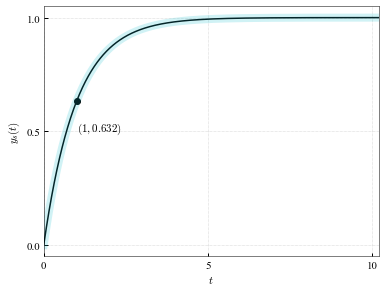

In [9]:
fig, ax = plt.subplots(figsize=(6, 4.6))

LS = linestyle_generator()

y, t = step(P, np.arange(0, 10.2, 0.01))    
pltargs = {'c':'k','ls': next(LS),'label':' '}
ax.plot(t, y, **pltargs)

y_th=np.array( list(map(lambda t:(K*(1-np.exp(-t/T))), t)))
ax.plot(t, y_th, lw=8, color='tab:cyan', alpha=0.2) # 理論式との比較

ax.set_xticks(np.arange(0, 10.2, step=5))
ax.set_yticks(np.arange(0, 1.6, step=0.5))
plot_set(ax, '$t$', '$y_s(t)$', 'best')    

ax.scatter(1, 0.632, color='k')
ax.annotate('$(1, 0.632)$', xy=(1, 0.5))

#plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
ax.get_legend().remove()

if (is_savefig):
    fig.savefig(figpath+"chap3/1st_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 図3.2 ２次系の時間応答

インパルス応答

In [10]:
#理論式の定義
def second_impulse(K,z,wn,t):
    if (z>1):
        p1 = wn*(-z+np.sqrt(z*z-1))
        p2 = wn*(-z-np.sqrt(z*z-1))        
        y = K*p1*p2/(p1-p2)*(np.exp(p1*t)-np.exp(p2*t))
    elif (z==1):
        y = K*wn*wn*np.exp(-wn*t)*t
    else:
        y = K*wn/np.sqrt(1-z*z)*np.exp(-z*wn*t)*np.sin(wn*np.sqrt(1-z*z)*t)
    return(y)

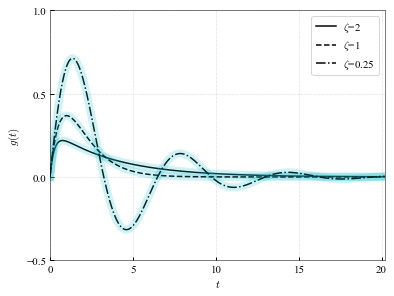

In [11]:
fig, ax = plt.subplots(figsize=(6, 4.6))

LS = linestyle_generator()

zeta = [2, 1, 0.25]
omega_n = 1
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = impulse(P, np.arange(0, 20.2, 0.01))
    
    pltargs = {'c':'k','ls': next(LS), 'label': '$\zeta$='+str(zeta[i])}
    ax.plot(t, y, **pltargs)
    
    y_th=np.array( list(map(lambda t:second_impulse(K,zeta[i],omega_n,t), t)))
    ax.plot(t, y_th, lw=8, color='tab:cyan', alpha=0.2) # 理論式との比較

ax.set_xticks(np.arange(0, 20.2, step=5))
ax.set_yticks(np.arange(-0.5, 1.1, step=0.5))
plot_set(ax, '$t$', '$g(t)$', 'best')    
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
#ax.get_legend().remove()

if (is_savefig):
    fig.savefig(figpath+"chap3/2nd_impulse.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

ステップ応答

In [12]:
#理論式の定義
def second_step(K,z,wn,t):
    if (z>1):
        p1 = wn*(-z+np.sqrt(z*z-1))
        p2 = wn*(-z-np.sqrt(z*z-1))        
        y = K*(1 + 1/(p1-p2) * (p2*np.exp(p1*t)-p1*np.exp(p2*t)) )
    elif (z==1):
        y = K*(1 - np.exp(-wn*t)*(1+wn*t) )
    else:
        theta = np.arctan2(1-z*z,z)
        y = K*(1 - 1/np.sqrt(1-z*z) * np.exp(-z*wn*t) * np.sin(wn*np.sqrt(1-z*z)*t + theta))
    return(y)

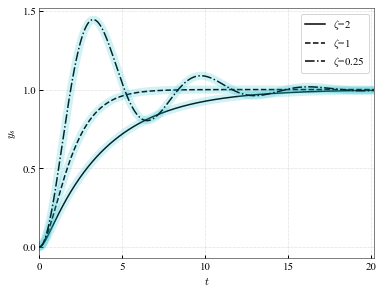

In [13]:
fig, ax = plt.subplots(figsize=(6, 4.6))

LS = linestyle_generator()

zeta = [2, 1, 0.25]
omega_n = 1
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 20.2, 0.01))
    
    pltargs = {'c':'k','ls': next(LS), 'label': '$\zeta$='+str(zeta[i]) }
    ax.plot(t, y, **pltargs)
    
    y_th=np.array( list(map(lambda t:second_step(K,zeta[i],omega_n,t), t)))
    ax.plot(t, y_th, lw=8, color='tab:cyan', alpha=0.2) # 理論式との比較
    
ax.set_xticks(np.arange(0, 20.2, step=5))
ax.set_yticks(np.arange(0, 1.6, step=0.5))
plot_set(ax, '$t$', '$y_s$', 'best')    
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)


if (is_savefig):
    fig.savefig(figpath+"chap3/2nd_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 図3.3 2次系の固有値の配置と解のふるまい

In [14]:
def behavior_plot(A,filename):
    w = 1.5
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]

    s,v = np.linalg.eig(A)
    
    print('固有値=',s)
    U = A[0,0]*X + A[0,1]*Y
    V = A[1,0]*X + A[1,1]*Y

    t = np.arange(-1.5, 1.5, 0.01)

    fig, ax = plt.subplots(figsize=(3, 3))

    # 固有空間のプロット
    if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
        ax.plot(t, (v[1,0]/v[0,0])*t, ls='--', color='k', lw=1)
        ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=1)
    
    ax.streamplot(X, Y, U, V, density=0.4, color='k', linewidth=0.2)
    ax.scatter(0, 0, color='k')

    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_xticks(np.arange(-0, 1.0, step=1.0))
    ax.set_yticks(np.arange(-0, 1.0, step=1.0))

    #ax.axhline(1, color="k", linewidth=0.5)
    plot_set(ax, '$x_1$', '$x_2$')

    if (is_savefig):
        fig.savefig(figpath+"/chap3/"+filename+".pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)
    

$A$行列をいろいろ変えてプロット

固有値= [-1. -2.]


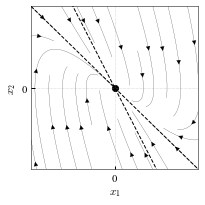

In [15]:
behavior_plot(np.matrix([[0, 1],[-2, -3 ]]) ,'ss_stable_node')

固有値= [-2. -2.]


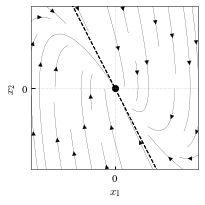

In [16]:
behavior_plot(np.matrix([[0, 1],[-4, -4 ]]) ,'ss_common_pole')

固有値= [-1.+1.j -1.-1.j]


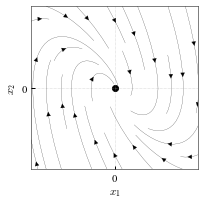

In [17]:
behavior_plot(np.matrix([[0, 1],[-2, -2 ]]) ,'ss_stable_focus')

固有値= [0.+1.j 0.-1.j]


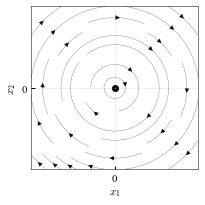

In [18]:
behavior_plot(np.matrix([[0, 1],[-1, 0 ]]) ,'ss_center')

固有値= [ 0. -1.]


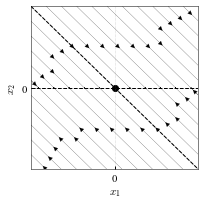

In [19]:
behavior_plot(np.matrix([[0, 1],[0, -1 ]]) ,'ss_integrator')

## 3.3 周波数応答

### 3.3.1 正弦波応答

下記章末問題【５】を参照

### 3.3.2 周波数応答

下記章末問題【６】を参照

### 3.3.3 基本的なシステムの周波数応答

In [20]:
def my_bode_plot(G,filename):
    fig, ax = plt.subplots(2, 1, figsize=(4, 4)) 

    #ボード線図
    gain, phase, w = bode(G, logspace(-2,2,1000), plot=False)
    ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
    ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

    bodeplot_set(ax)

    ax[0].semilogx(w, 0*w, c='c', ls='-', lw=0.5)    
    ax[0].set_ylim([-150,100])
    ax[1].set_ylim([-280,100])
    ax[1].set_yticks([-360,-270,-180,-90,0,90])

    fig.tight_layout()
    if (is_savefig):
        fig.savefig(figpath+"chap3/"+filename+".pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

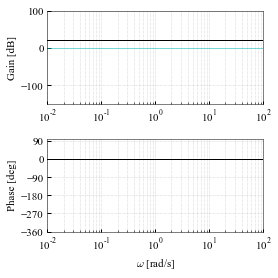

In [21]:
#比例要素
K=10
G=tf([K],[1])
my_bode_plot(G,'bode_1_proportional')

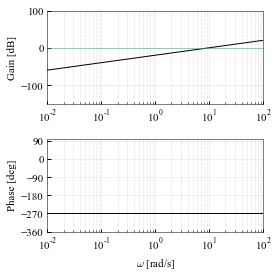

In [22]:
#微分要素
T=0.1
G=tf([T,0],[1])
my_bode_plot(G,'bode_2_derivative')

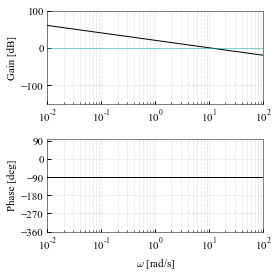

In [23]:
#積分要素
T=0.1
G=tf([1],[T,0])
my_bode_plot(G,'bode_3_integral')

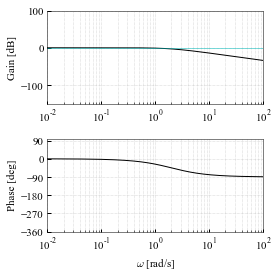

In [24]:
#1次遅れ要素
T=0.5
G=tf([1],[T,1])
my_bode_plot(G,'bode_4_1st')

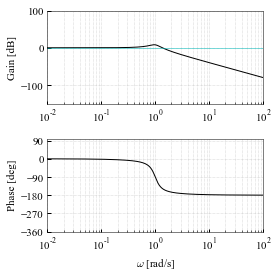

In [25]:
#2次遅れ要素
zeta=0.2
w_n=1
G=tf([w_n**2],[1,2*zeta*w_n,w_n**2])
my_bode_plot(G,'bode_5_2nd')

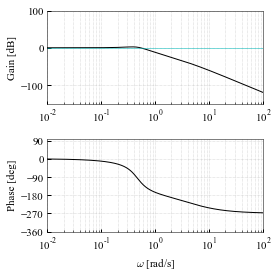

In [26]:
#3次遅れ要素
w_n=1
alpha_1=2
alpha_2=5
G=tf([w_n**3],[1,alpha_2*w_n,alpha_1*w_n**2,w_n**3])
my_bode_plot(G,'bode_6_3rd')

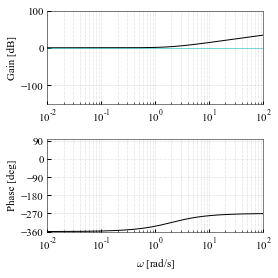

In [27]:
#1次進み要素（位相が-360°回っているので注意）
T=0.5
G=tf([T,1],[1])
my_bode_plot(G,'bode_7_1st_lead')

## 章末問題

### 【３】 行列指数関数と解のふるまい

In [28]:
A = np.array([[0, 1], [16, -6]])
B = np.array([[0], [1]])
C = np.array([1, 0])
D = np.array([0])
# B, C, Dはなんでもよい

In [29]:
sys = ss(A, B, C, D)

In [30]:
#理論式（遷移行列）
def transition(t,p0):   
    At = (np.array([[2,-1],[-16,8]])*np.exp(-8*t) + np.array([[8,1],[16,2]])*np.exp(2*t))/10
    return np.dot(At,p0)

In [31]:
s, v = np.linalg.eig(A) 
print('Aの固有値は，', s)

Aの固有値は， [ 2. -8.]


傾き 2.0
傾き -8.0


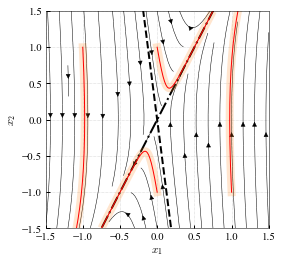

In [32]:
fig, ax = plt.subplots(figsize=(4, 4))

w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

t = np.arange(-1.5, 1.5, 0.01)
print('傾き',v[1,0]/v[0,0])
print('傾き',v[1,1]/v[0,1])

# 固有空間のプロット
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot(t, (v[1,0]/v[0,0])*t, ls='-.', color='k', lw=2)
    ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=2)
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
ax.grid(ls = ':')
plot_set(ax, '$x_1$', '$x_2$')

T = np.arange(0,1,0.01)

x=np.array( list(map(lambda t:transition(t,[0,1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2) # 理論式との比較
_, _, x = initial(sys, X0=[0,1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r',)                    #　シミュレーション結果

x=np.array( list(map(lambda t:transition(t,[0,-1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[0,-1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

x=np.array( list(map(lambda t:transition(t,[1,-1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[1, -1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

x=np.array( list(map(lambda t:transition(t,[-1,1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[-1,1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_3_phase_portrait.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

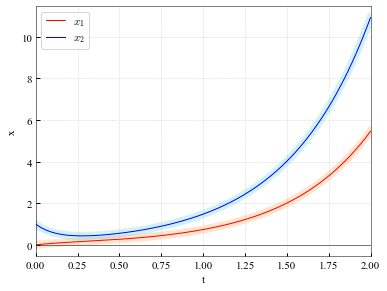

In [33]:
fig, ax = plt.subplots(figsize=(6, 4.6))

T = np.arange(0,2.01,0.01)
x0 = [0,1]

x=np.array( list(map(lambda t:transition(t,x0), T)))  # 理論式
ax.plot(T, x[:,0], lw=8, color='tab:orange', alpha=0.2)
ax.plot(T, x[:,1], lw=8, color='tab:cyan', alpha=0.2)
_, _, x = initial(sys, X0=x0, T=T, return_x=True)     # シミュレーション
ax.plot(T, x[:,0], lw=1, color='r', label='$x_1$')                    
ax.plot(T, x[:,1], lw=1, color='b', label='$x_2$')                    

ax.axhline(0, color="k", linewidth=0.5)  
ax.grid(ls = ':')
plot_set(ax,'t','x','best')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_3_time_response.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 【４】　初期値応答と入力応答

In [34]:
A = np.array([[-1, -1], [1, -1]])
B = np.array([[0], [1]])
C = np.array([1, 0])
D = np.array([0])

In [35]:
sys = ss(A, B, C, D)

In [36]:
s, v = np.linalg.eig(A) 
print('Aの固有値は，', s)

Aの固有値は， [-1.+1.j -1.-1.j]


In [37]:
#理論式（遷移行列）
def transition(t,p0):
    At = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)] ])*np.exp(-t)
    return np.dot(At,p0)

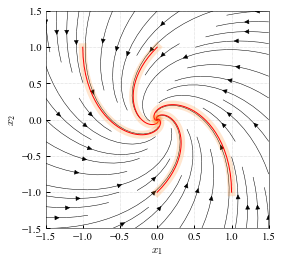

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))

w = 1.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

t = np.arange(-1.5, 1.5, 0.01)
# print('傾き',v[1,0]/v[0,0])
# print('傾き',v[1,1]/v[0,1])

# 固有空間のプロット
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot(t, (v[1,0]/v[0,0])*t, ls='-.', color='k', lw=2)
    ax.plot(t, (v[1,1]/v[0,1])*t, ls='--', color='k', lw=2)
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
ax.grid(ls = ':')
plot_set(ax, '$x_1$', '$x_2$')

T = np.arange(0,5,0.01)

x=np.array( list(map(lambda t:transition(t,[0,1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2) # 理論式との比較
_, _, x = initial(sys, X0=[0,1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r',)                    #　シミュレーション結果

x=np.array( list(map(lambda t:transition(t,[0,-1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[0,-1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

x=np.array( list(map(lambda t:transition(t,[1,-1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[1, -1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

x=np.array( list(map(lambda t:transition(t,[-1,1]), T)))   
ax.plot(x[:,0], x[:,1], lw=8, color='tab:orange', alpha=0.2)
_, _, x = initial(sys, X0=[-1,1], return_x=True)
ax.plot(x[:,0], x[:,1], lw=1, color='r')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_4_phase_portrait.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

(2) ゼロ入力応答とゼロ状態応答の和

In [39]:
#理論式（ゼロ状態応答+ゼロ入力応答．時刻t,初期状態p0,定数入力u0）
def total_response(t,p0,u0):
    At = np.array([np.cos(t), -np.sin(t)])*np.exp(-t)
    zero_input_response = np.dot(At, p0)
    zero_state_response = (np.exp(-t)*(np.sin(t) + np.cos(t)) - 1) /2 * u0
    return (zero_input_response + zero_state_response)

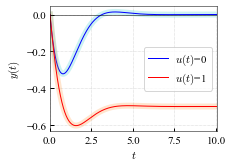

In [40]:
fig, ax = plt.subplots(figsize=(3, 2.3))

T = np.arange(0,10.1,0.01)
x0 = [0,1]

# u(t)==0のとき
y = np.array( list(map(lambda t:total_response(t,x0, 0), T)))  # 理論式
ax.plot(T, y, lw=6, color='c', alpha=0.2)
y, _, _ = lsim(sys, U=0, X0=x0, T=T)                           # シミュレーション
ax.plot(T, y, lw=1, color='b', label='$u(t)$=0')                    

# u(t)==１のとき
y = np.array( list(map(lambda t:total_response(t,x0, 1), T)))  # 理論式
ax.plot(T, y, lw=6, color='tab:orange', alpha=0.2)
y, _, _ = lsim(sys, U=1, X0=x0, T=T)                           # シミュレーション
ax.plot(T, y, lw=1, color='r', label='$u(t)$=1')    


ax.axhline(0, color="k", linewidth=0.5)  
plot_set(ax, '$t$', '$y(t)$', 'best')
ax.grid(ls = ':')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_4_time_response.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 【５】 正弦波応答

In [41]:
G = tf([1], [1, 10])
A = 5
w0 = 100

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


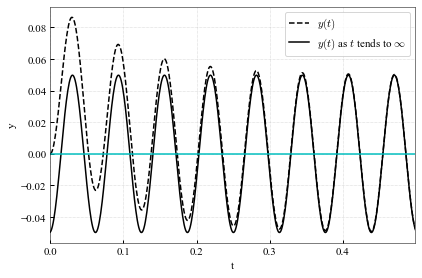

In [42]:
fig, ax = plt.subplots(1,1,figsize=(6,4)) 
absG = 1 / (10*np.sqrt(101)) # 絶対値
argG = np.arctan(-10)        # 偏角[rad]

t = np.arange(0, 0.5, 0.001)
u = A * np.sin(w0*t)
y, t, x0 = lsim(G, u, t)            # シミュレーション
y_inf = A * absG * np.sin(w0*t + argG) # 定常正弦波応答の理論値
    
# ax.plot(t, 0.01*u, ls='--', label='u', color='k')
ax.plot(t, y, label='$y(t)$', ls='--', color='k')
ax.plot(t, y_inf, label='$y(t)$ as $t$ tends to $\infty$', color='k')
ax.plot(t, 0*t, color='c')
plot_set(ax, 't', 'y', 'best')

fig.tight_layout()
if (is_savefig):
    fig.savefig(figpath+"ans/ch3_5_sinusoids.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

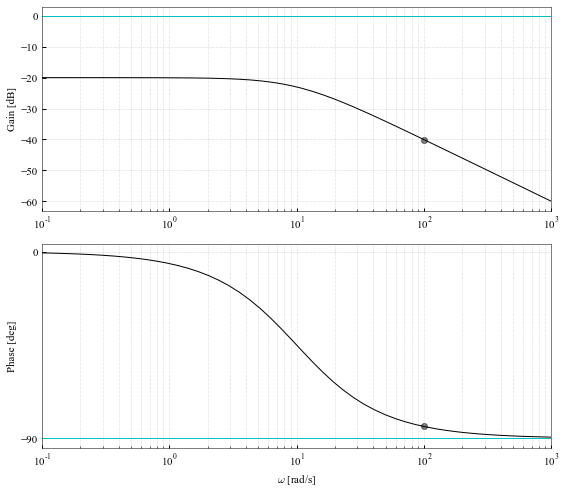

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 

gain, phase, w = bode(G, logspace(-1,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)
ax[0].scatter(w0, 20*np.log10(absG), alpha=0.5, c='k')
ax[1].scatter(w0, argG*180/np.pi,    alpha=0.5, c='k')

ax[0].semilogx(w, 0*w, c='c', ls='-', lw=1)
ax[1].semilogx(w, -90*np.ones_like(w), c='c', ls='-', lw=1)
ax[1].set_yticks([-90,0])

fig.tight_layout()
if (is_savefig):
    fig.savefig(figpath+"ans/ch3_5_Bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 【6】 Bode線図とベクトル軌跡

$G=G_0 G_1 G_2 G_3$と分解します．

In [44]:
s = tf([1, 0],[1])
G0 = tf([10],[1])    #伝達関数と認識させる
G1 = 1/s
G2 = 1/(s+1)
G3 = 10/(s+10)       #G3の定数ゲインを1にするために，分子に10を乗せておきます
G = G0 * G1 * G2 * G3
print(G0, G1, G2, G3, G)


10
--
1
 
1
-
s
 
  1
-----
s + 1
 
  10
------
s + 10
 
        100
-------------------
s^3 + 11 s^2 + 10 s



$G_0,G_1$のボード線図

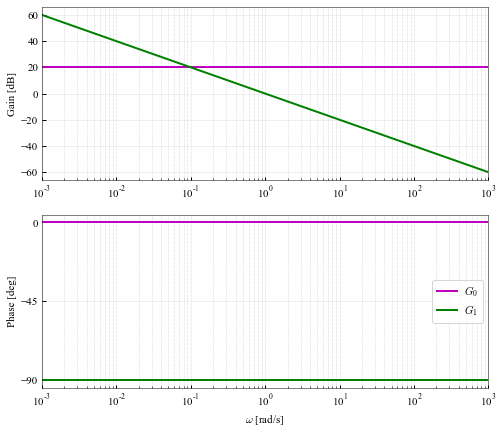

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 

#ゲイン要素G0
gain, phase, w = bode(G0, logspace(-3,3,1000), plot=False)    
ax[0].semilogx(w, 20*np.log10(gain), c='m', ls='-', lw=2)
ax[1].semilogx(w, phase*180/np.pi, c='m', ls='-', lw=2, label='$G_0$')

#積分要素G1
gain, phase, w = bode(G1, logspace(-3,3,1000), plot=False)    
ax[0].semilogx(w, 20*np.log10(gain), c='g', ls='-', lw=2)
ax[1].semilogx(w, phase*180/np.pi, c='g', ls='-', lw=2,  label='$G_1$')

ax[0].set_xlim([1e-3,1e3])
ax[1].set_xlim([1e-3,1e3])
ax[1].set_yticks([-90,-45,0])
bodeplot_set(ax,'best')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_6_Bode_decomp1.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

$G_2,G_3$のボード線図（折れ線近似）

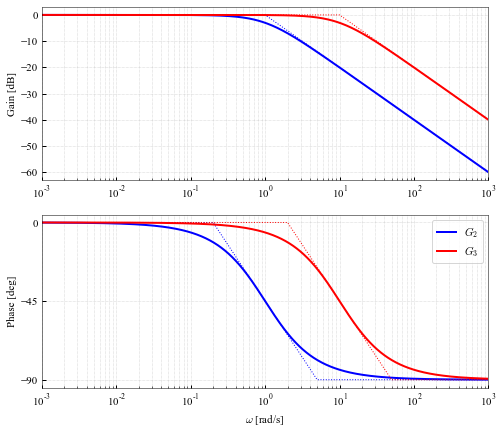

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 
#1次遅れ要素G2
gain, phase, w = bode(G2, logspace(-3,3,1000), plot=False)    
ax[0].semilogx(w, 20*np.log10(gain), c='b', ls='-', lw=2)
ax[1].semilogx(w, phase*180/np.pi, c='b', ls='-', lw=2, label='$G_2$')
# 折れ線近似
ax[0].plot([1e-3,1e-0,1e3],[0,0,-60], c='b', ls=':', lw=1)
ax[1].plot([1e-3, 1/5, 1*5, 1e3],[0,0,-90,-90], c='b', ls=':', lw=1)

#1次遅れ要素G3
gain, phase, w = bode(G3, logspace(-3,3,1000), plot=False)    
ax[0].semilogx(w, 20*np.log10(gain), c='r', ls='-', lw=2)
ax[1].semilogx(w, phase*180/np.pi, c='r', ls='-', lw=2, label='$G_3$')
# 折れ線近似
ax[0].plot([1e-3,1e1,1e3],[0,0,-40], c='r', ls=':', lw=1)
ax[1].plot([1e-3, 1e1/5, 1e1*5, 1e3],[0,0,-90,-90], c='r', ls=':', lw=1)

ax[0].set_xlim([1e-3,1e3])
ax[1].set_xlim([1e-3,1e3])
ax[1].set_yticks([-90,-45,0])
bodeplot_set(ax, 'best')

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_6_Bode_decomp2.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

全てを重ね合わせたものは以下のとおり．

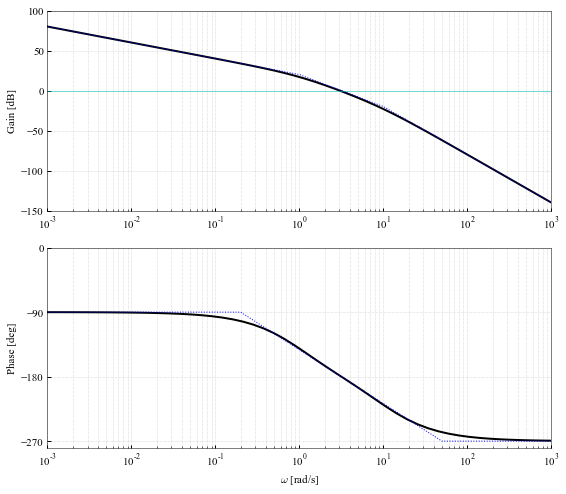

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 

gain, phase, w = bode(G, logspace(-3,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=2)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=2)
# 折れ線近似
ax[0].plot([1e-3,1e-0,1e1,1e3],[80,20,-20,-140], c='b', ls=':', lw=1)
ax[1].plot([1e-3, 1/5, 10*5, 1e3],[-90,-90,-270,-270], c='b', ls=':', lw=1)

bodeplot_set(ax)

ax[0].semilogx(w, 0*w, c='c', ls='-', lw=0.5)
ax[0].set_ylim([-150,100])
ax[1].set_yticks([-270,-180,-90,0])

fig.tight_layout()
if (is_savefig):
    fig.savefig(figpath+"ans/ch3_6_Bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

ベクトル軌跡は以下のとおり

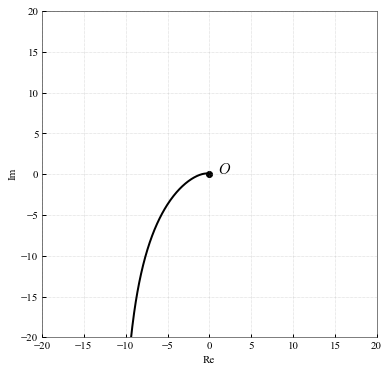

In [48]:
fig, ax = plt.subplots(1,1,figsize=(6, 6)) 

x, y, _ = nyquist(G, logspace(-3,3,1000), plot=False)

ax.plot(x, y, c='k', ls='-', lw=2)

ax.grid(ls=':', lw=0.5)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
    
ax.set_xlim(-20,20)
ax.set_ylim(-20, 20)

#点0
ax.scatter(0, 0, color='k')
ax.annotate('$O$', xy=(1, 0), size=15)

if (is_savefig):
    fig.savefig(figpath+"ans/ch3_6_Vector.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)